# Assignment 1 

## First draft
### Youssef Ragab


**1. Loading in the required libraries:**

In [13]:
import pandas as pd 
import matplotlib.pyplot as plt 
import h2o 
import time 
import seaborn as sns 
import numpy as np

Initializations: 

In [4]:
Seed = 2021

nthreads = 4

h2o.init(max_mem_size= '6G', nthreads= nthreads)
h2o.remove_all()
h2o.no_progress()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,25 mins 26 secs
H2O_cluster_timezone:,Africa/Cairo
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.1.3
H2O_cluster_version_age:,9 days
H2O_cluster_name:,H2O_from_python_youssefragab_12uz48
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,5.319 Gb
H2O_cluster_total_cores:,12
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"locked, healthy"


Start global timer:

In [5]:
tic = time.time()

Importing data: 

In [6]:
train = pd.read_csv('hmda_train_preprocessed.csv')
test = pd.read_csv('hmda_test_preprocessed.csv')

In [7]:
train.columns

Index(['row_id', 'black', 'asian', 'white', 'amind', 'hipac', 'hispanic',
       'non_hispanic', 'male', 'female', 'agegte62', 'agelt62', 'term_360',
       'conforming', 'debt_to_income_ratio_missing', 'loan_amount_std',
       'loan_to_value_ratio_std', 'no_intro_rate_period_std',
       'intro_rate_period_std', 'property_value_std', 'income_std',
       'debt_to_income_ratio_std', 'high_priced'],
      dtype='object')

In [8]:
test.columns

Index(['row_id', 'black', 'asian', 'white', 'amind', 'hipac', 'hispanic',
       'non_hispanic', 'male', 'female', 'agegte62', 'agelt62', 'term_360',
       'conforming', 'debt_to_income_ratio_missing', 'loan_amount_std',
       'loan_to_value_ratio_std', 'no_intro_rate_period_std',
       'intro_rate_period_std', 'property_value_std', 'income_std',
       'debt_to_income_ratio_std'],
      dtype='object')

Now that we have the datasets loaded, we can proceed and remove the columns that we don't need from the training set. Based on the assignment prompt, we are going to keep the following variables:
* high_priced
* conforming 
* debt_to_income_ratio_std
* debt_to_income_ratio_missing
* income_std 
* loan_amount_std
* intro_rate_period_std
* loan_to_value_ratio_std
* no_intro_rate_period_std
* property_value_std
* term_360

In [9]:
x_name = ['conforming', 'debt_to_income_ratio_std', 'debt_to_income_ratio_missing', 'income_std', 'loan_amount_std', 'intro_rate_period_std', 'loan_to_value_ratio_std', 'no_intro_rate_period_std', 'property_value_std', 'term_360']
y_name = 'high_priced'

train = train[x_name + [y_name]]

Now that we have only kept the columns that we need from the training set, we can do the same for the testing or validation set. 

In [10]:
test = test[x_name]
test.columns

Index(['conforming', 'debt_to_income_ratio_std',
       'debt_to_income_ratio_missing', 'income_std', 'loan_amount_std',
       'intro_rate_period_std', 'loan_to_value_ratio_std',
       'no_intro_rate_period_std', 'property_value_std', 'term_360'],
      dtype='object')

### Data exploration:

**Histograms:**

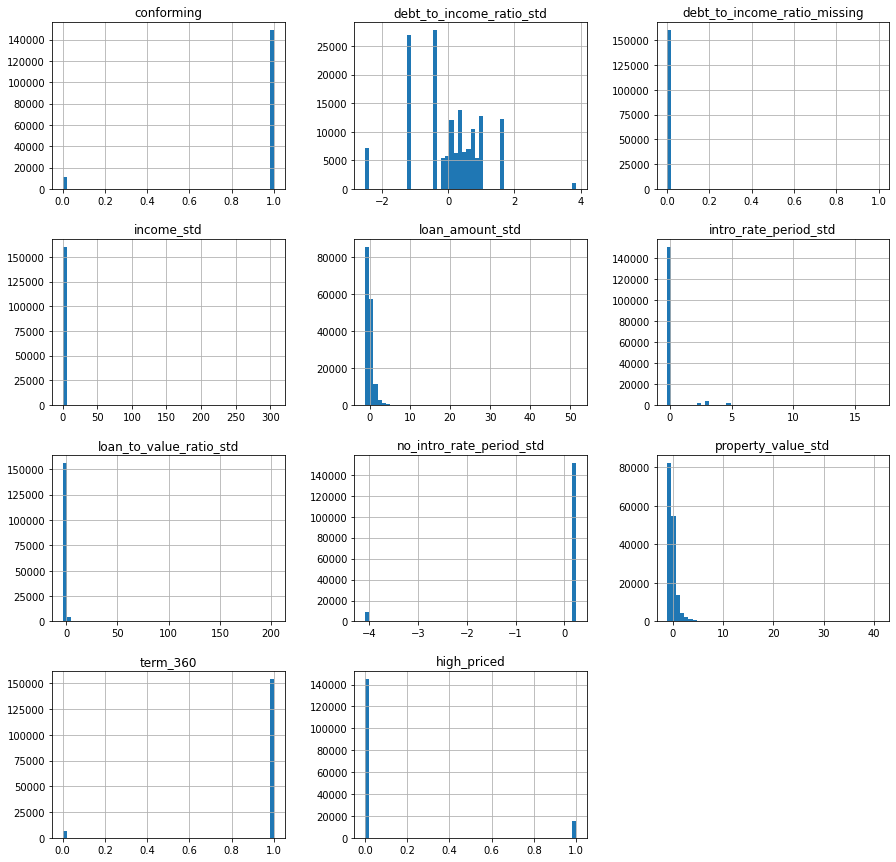

In [11]:
_ = train.hist(bins = 50, figsize= (15,15))

**Correlation:**

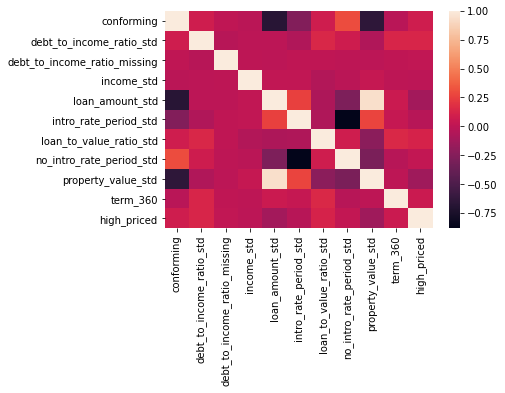

In [12]:
_ = sns.heatmap(train.corr(),
                xticklabels= train.columns.values,
                yticklabels= train.columns.valuesß)

Since the testing set does not have the y column, there is no need to add it, and we are left with the same variables as the training set. 

We can move ahead to training the model. 

### Fitting interpretable models: 

**Splitting data into training and validation subsets:**

In [17]:
np.random.seed(Seed)

split_ratio = 0.7

split = np.random.rand(len(train)) < split_ratio

training = train[split]
validation = train[~split]

print('Train data rows = %d, columns = %d' % (training.shape[0], training.shape[1]))
print('Train data rows = %d, columns = %d' % (validation.shape[0], validation.shape[1])) 

Train data rows = 112085, columns = 11
Train data rows = 48253, columns = 11
